In [58]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pylab as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Regresion logistica para una sola variable.

$$s_\theta(x) = g(x) =  \frac{1}{1+ e^{(\beta_0 + \beta_1 \cdot x)}}$$

La salida de la función sigmoidea es continua entre 0 y 1, pudiéndose interpretar como probabilidad de pertenencia a la clase 1

Seguimos necesitando definir un umbral, continuemos considerando 0,5
  * Si $s_\beta(x) < 0.5$  entonces $x$ pertencerá a la clase 0
  * Si $s_\beta(x) \ge 0.5$  entonces $x$ pertencerá a la clase 1



Usamos el dataset que se obtuvo de wikipedia.
[Ejemplo wiki](https://en.wikipedia.org/wiki/Logistic_regression)

* Variable predictora: hours: Horas de estudio
* Variable objetivo (target): pass
    - aprobo (1)
    - reprobo (0)

In [59]:
# Crear un DataFrame de ejemplo
data = {'hours': [0.5, 0.75, 1, 1.25, 1.5, 1.75, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50],
        'pass': [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1]}
df = pd.DataFrame(data)
df

,hours,pass
0,0.50,0
1,0.75,0
2,1.00,0
3,1.25,0
4,1.50,0
5,1.75,0
6,1.75,1
7,2.00,0
8,2.25,1
9,2.50,0


<Axes: xlabel='hours', ylabel='pass'>

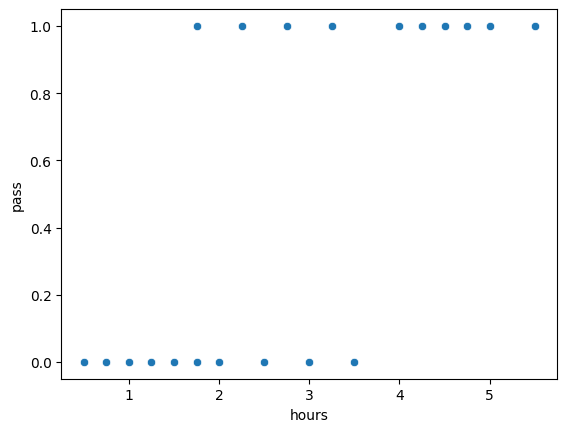

In [60]:
# Graficmos los datos
sns.scatterplot(x='hours', y='pass', data=df)

In [61]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X = df[['hours']]
y = df['pass']
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Crear y entrenar el modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Predecir las etiquetas para el conjunto de prueba
y_pred = model.predict(X_test)

Que tambiem predice el modelo

In [62]:
print(y_test.values) # es una serie
print(y_pred) # es un narray

[1 1 1 0 0]
[0 1 1 0 0]


In [63]:
# calculaamos el accuracy
print(model.score(X_test, y_test))

0.8


Los parámetros de la función sigmoide se estiman automáticamente cuando se ajusta el modelo de regresión logística utilizando el método fit del objeto LogisticRegression. Los valores estimados de los parámetros se almacenan en los atributos intercept_ y coef_ del modelo ajustado.

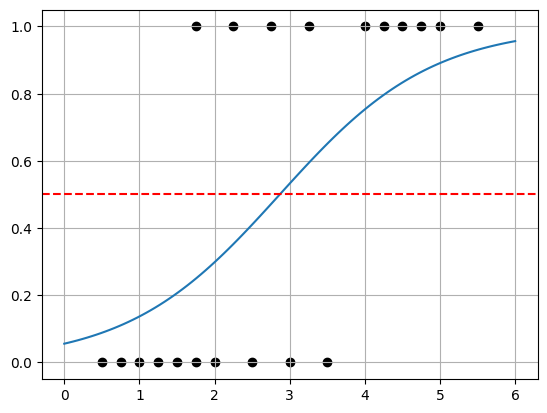

In [64]:
# Plot the data
plt.scatter(df['hours'], df['pass'], color='black')

# Create a sigmoid function to represent the logistic regression model
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Plot the sigmoid curve
x = np.linspace(0, 6, 100)

# Los parametros se estiman automatiamente
beta_0 = model.intercept_[0]
beta_1 = model.coef_[0][0]
y = sigmoid(beta_0 + beta_1 * x)

plt.plot(x, y)
# Show the plot

# diujamos un linea en y = 0.5 y su interseccion con la curva
plt.axhline(y=0.5, color='r', linestyle='--')

plt.grid()
plt.show()

In [65]:
# Crear un DataFrame con una columna llamada 'hours'
data = {'hours': [2.7, 2.9, 3, 3.1, 3.2, 3.5]}
df = pd.DataFrame(data)

# Predecir la etiqueta utilizando el DataFrame
y_pred = model.predict(df)
# el criterio se clasisficacion es 0.5.
y_pred

array([0, 1, 1, 1, 1, 1], dtype=int64)

# Regresion logistica para dos variables

$$s_\theta(x) = g(\beta^T x) =  \frac{1}{1+ e^{(-\beta^T x)}}$$

La salida de la función sigmoidea es continua entre 0 y 1, pudiéndose interpretar como probabilidad de pertenencia a la clase 1

Seguimos necesitando definir un umbral, continuemos considerando 0,5
  * Si $s_\beta(x) < 0.5$  entonces $x$ pertencerá a la clase 0
  * Si $s_\beta(x) \ge 0.5$  entonces $x$ pertencerá a la clase 1

Elegir como umbral 0.5 nos da una imterpretación simple de  $\beta^Tx$:
$$ s_\theta(x) = 0.5 \\ \Rightarrow \beta^Tx = 0$$ 
Es la ecuación de un hiperplano! 


Por ejemplo:

$\beta_0 +\beta_1 x_1 + \beta_2 x_2 =0 $

Se puede transformar en:

$- \beta_2 x_2 = \beta_0 +\beta_1 x_1 $

$ x_2 =   - \frac{\beta_1}{\beta_2} x_1 - \frac{\beta_0}{\beta_2}$

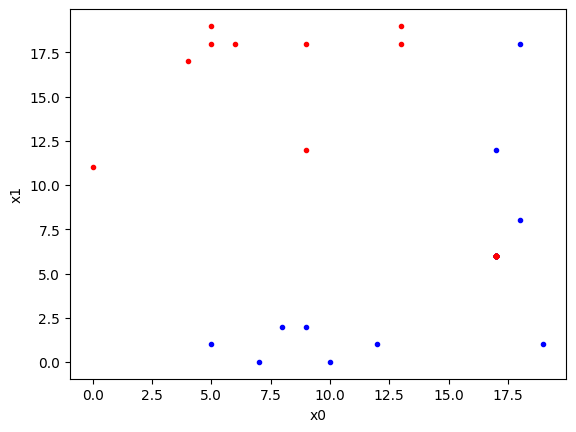

In [66]:
# Genero un dataset sintético
X = np.random.randint(20, size=(20,2))
beta = np.array([[-0.1],[0.1]])
Y = np.round( 1/(1+np.exp(np.dot(-X, beta))))

ind0 = np.where(Y==0)
ind1 = np.where(Y==1)
plt.plot(X[ind0,0],X[ind0,1],'b.') 
plt.plot(X[ind1,0],X[ind1,1],'r.')
plt.xlabel("x0")
plt.ylabel("x1")
plt.show()

c:\Programas\Python3-10-6\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


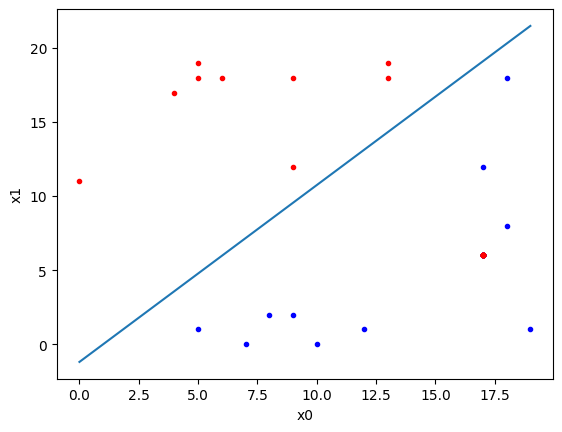

In [67]:
# Creo el clasificador 
clf = LogisticRegression()
clf.fit(X, Y)

# Obtengo coeficientes para el modelo b0 + b1X + b2Y=0
beta_0 = clf.intercept_
beta_1 = clf.coef_[0,0]
beta_2 = clf.coef_[0,1]

#Graficamos
x1 = np.arange(0,20,1)
x2 = - beta_1/beta_2*x1 - beta_0/beta_2
plt.plot(x1,x2)

ind0 = np.where(Y==0)
ind1 = np.where(Y==1)
plt.plot(X[ind0,0],X[ind0,1],'b.') 
plt.plot(X[ind1,0],X[ind1,1],'r.')
plt.xlabel("x0")
plt.ylabel("x1")
plt.show()